In [1]:
# Import some common packages
import os
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from pandas.plotting import scatter_matrix # optional
from sklearn.preprocessing import Imputer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from scipy.stats import truncnorm
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# to make this notebook's output stable across runs
np.random.seed(42)

df = pd.read_csv("Expenditures.csv") # Assume csv data is in same directory as this notebook
print(df.head())
# print(df.info())
# print(df.describe())

   Income before taxes  Food  Housing  Transportation  Healthcare  Taxes  \
0                 7860  3938     9783            3401        2193   -369   
1                22315  4806    12817            4930        3360   -878   
2                34685  5878    14585            7191        4249    -70   
3                44771  6598    16216            7529        4558   1598   
4                59382  7443    18446            9545        4733   4357   

   Other  
0   2844  
1   3601  
2   4586  
3   5048  
4   5847  


                     Income before taxes      Food   Housing  Transportation  \
Income before taxes             1.000000  0.939722  0.954271        0.943825   
Food                            0.939722  1.000000  0.936319        0.948345   
Housing                         0.954271  0.936319  1.000000        0.949999   
Transportation                  0.943825  0.948345  0.949999        1.000000   
Healthcare                      0.918816  0.926045  0.914061        0.930359   
Taxes                           0.962404  0.891312  0.909493        0.889459   
Other                           0.964039  0.943438  0.958268        0.957777   

                     Healthcare     Taxes     Other  
Income before taxes    0.918816  0.962404  0.964039  
Food                   0.926045  0.891312  0.943438  
Housing                0.914061  0.909493  0.958268  
Transportation         0.930359  0.889459  0.957777  
Healthcare             1.000000  0.861121  0.914345  
Taxes                  0.861121  1.

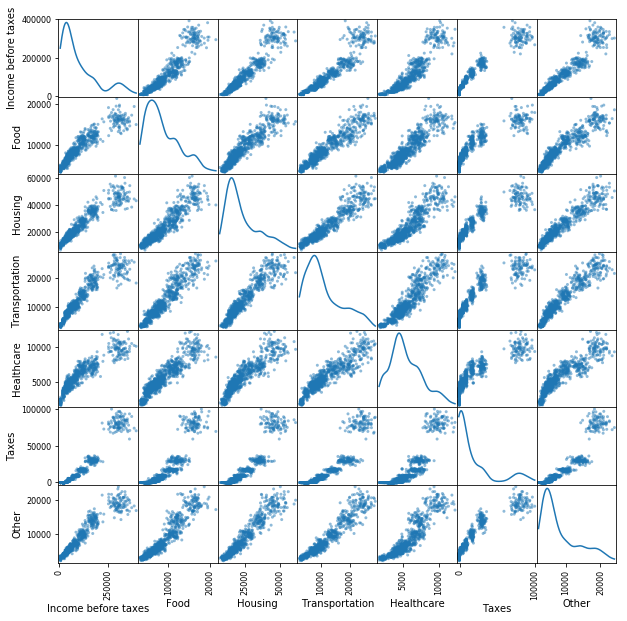

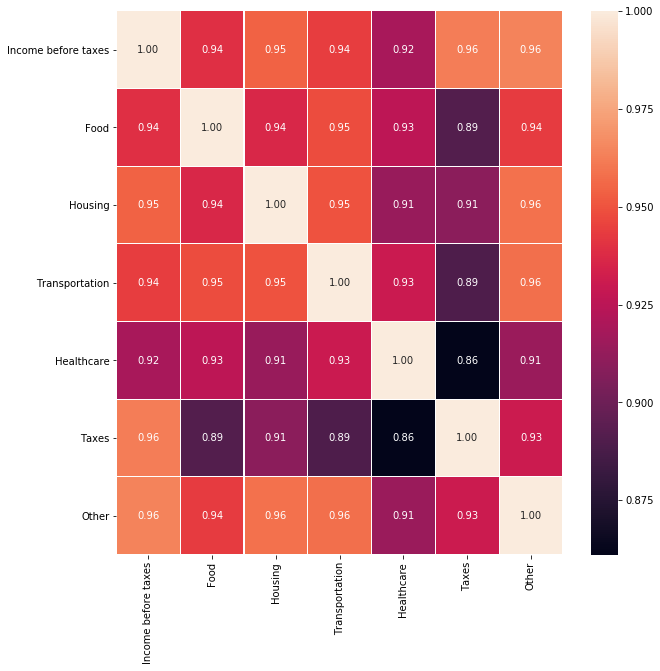

In [3]:
df.apply(pd.to_numeric)
# print(df)
print(df.corr())
pd.plotting.scatter_matrix(df, figsize=(10, 10), diagonal="kde")

# prettier correlation graphs using seaborn
fig, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(df.corr(), ax=ax, annot=True, linewidths=0.05, fmt= '.2f')
plt.show()

# d = {"Income before taxes": [], "Food": [], "Housing": [], "Transportation": [], "Healthcare": [], 
#      "Taxes": [], "Other": []}
# colLabels = ["Income before taxes", "Food", "Housing", "Transportation", "Healthcare", "Taxes", "Other"]
# for i in range(len(df)):
#     for j in range(len(df.columns)):
#         val = df[colLabels[j]][i]
#         d[colLabels[j]].extend(np.random.normal(val, abs(val * .1), 100000))
# df = pd.DataFrame(data=d)
# print(df)


In [27]:
yfood = df["Food"].values
yhousing = df["Housing"].values
ytransportation = df["Transportation"].values
yhealthcare = df["Healthcare"].values
ytaxes = df["Taxes"].values
yother = df["Other"].values
# yvals = [yfood, yhousing, ytransportation, yhealth, ytaxes, yother]
x = df["Income before taxes"].values
x = x.reshape(-1, 1)
# x_train, x_test,y_train, y_test = train_test_split(x,yfood,test_size = 0.20,random_state = 42)
# # feature scaling
# scaler =  StandardScaler()
# x_train_scaled = scaler.fit_transform(x_train)
# x_test_scaled = scaler.transform(x_test)
# lrfood = LinearRegression()
# lrfood.fit(x_train,y_train)
# y_predict = lrfood.predict(x_test)
# mse = mean_squared_error(y_test, y_predict)
# rmse = np.sqrt(mse)
# print(rmse)

lrfood = LinearRegression()
lrfood.fit(x,yfood) 
lrhousing = LinearRegression()
lrhousing.fit(x,yhousing) 
lrtransportation = LinearRegression()
lrtransportation.fit(x,ytransportation) 
lrhealthcare = LinearRegression()
lrhealthcare.fit(x,yhealthcare) 
lrtaxes = LinearRegression()
lrtaxes.fit(x,ytaxes) 
lrother = LinearRegression()
lrother.fit(x,yother) 
out = {"Income before taxes": [], "Food": [], "Housing": [], "Transportation": [], "Healthcare": [], 
     "Taxes": [], "Other": []}
for i in range(1000000):
    xval = np.array([i]).reshape(1, -1)
    out[colLabels[0]].extend([i])
    out[colLabels[1]].extend(lrfood.predict(xval))
    out[colLabels[2]].extend(lrhousing.predict(xval))
    out[colLabels[3]].extend(lrtransportation.predict(xval))
    out[colLabels[4]].extend(lrhealthcare.predict(xval))
    out[colLabels[5]].extend(lrtaxes.predict(xval))
    out[colLabels[6]].extend(lrother.predict(xval))
# print(out)
output = pd.DataFrame(data=out)
# print(output)
output.to_csv("model.csv", sep=',', encoding='utf-8')